PRAFULLA RAVA

##Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
terr_df=pd.read_csv('globalterrorismdb_0718dist.csv', encoding='cp1252')

In [ ]:
terr_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
terr_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
terr_df.isnull().sum()

eventid          0
iyear            0
imonth           0
iday             0
approxdate    2893
              ... 
INT_LOG          1
INT_IDEO         1
INT_MISC         1
INT_ANY          1
related       2649
Length: 135, dtype: int64

In [ ]:
terr_df2=terr_df.copy()

In [ ]:
terr_df2.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
terr_df2.dropna(axis=1, how='all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,197503270005,1975,3,27,NaN,0,NaN,185,Spain,8,Western Europe,Biscay,Bilbao,43.258434,-2.921819,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,14,Private Citizens & Property,80.0,Memorial/Cemetery/Monument,NaN,monument,...,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,0.0,1.0,NaN
2905,197503270006,1975,3,27,NaN,0,NaN,185,Spain,8,Western Europe,Gipuzcoa,Legazpi,43.054361,-2.333641,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,7.0,Retail/Grocery/Bakery,NaN,telephone company,...,NaN,NaN,NaN,Explosive,NaN,NaN,0.0,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,0.0

In [ ]:
terr_df2.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
terr_df2=terr_df2[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terr_df2.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
terr_df2.isnull().sum()

Year              0
Month             0
Day               0
Country           0
state            10
Region            0
city              0
latitude         48
longitude        48
AttackType        0
Killed          305
Wounded        1062
Target           47
Summary        2188
Group             0
Target_type       0
Weapon_type       0
Motive         2449
dtype: int64

In [ ]:
terr_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         2909 non-null   int64  
 1   Month        2909 non-null   int64  
 2   Day          2909 non-null   int64  
 3   Country      2909 non-null   object 
 4   state        2899 non-null   object 
 5   Region       2909 non-null   object 
 6   city         2909 non-null   object 
 7   latitude     2861 non-null   float64
 8   longitude    2861 non-null   float64
 9   AttackType   2909 non-null   object 
 10  Killed       2604 non-null   float64
 11  Wounded      1847 non-null   float64
 12  Target       2862 non-null   object 
 13  Summary      721 non-null    object 
 14  Group        2909 non-null   object 
 15  Target_type  2909 non-null   object 
 16  Weapon_type  2909 non-null   object 
 17  Motive       460 non-null    object 
dtypes: float64(4), int64(3), object(11)
memory usage

In [ ]:
print("Country with the most attacks:",terr_df2['Country'].value_counts().idxmax())
print("Region with the most attacks:",terr_df2['Region'].value_counts().idxmax())
print("Year with the most attacks:",terr_df2['Year'].value_counts().idxmax())
print("Month with the most attacks:",terr_df2['Month'].value_counts().idxmax())
print("Group with the most attacks:",terr_df2['Group'].value_counts().index[1])
print("Most Attack types:",terr_df2['AttackType'].value_counts().idxmax())

Country with the most attacks: United States
Region with the most attacks: Western Europe
Year with the most attacks: 1970
Month with the most attacks: 3
Group with the most attacks: Irish Republican Army (IRA)
Most Attack types: Bombing/Explosion


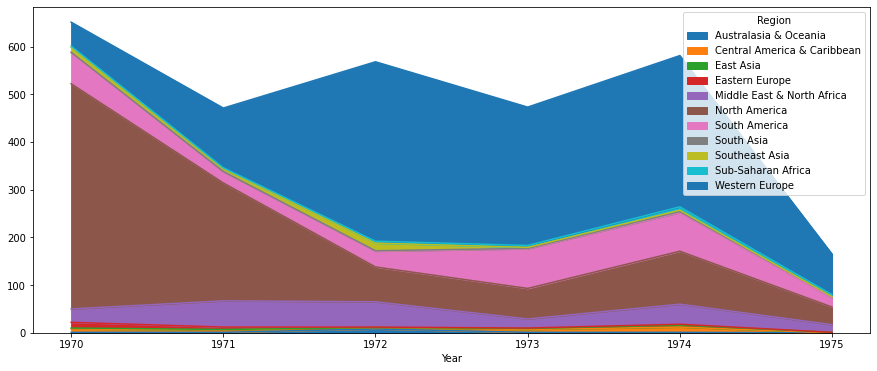

In [ ]:
pd.crosstab(terr_df2.Year, terr_df2.Region).plot(kind='area', figsize=(15,6))
plt.show()

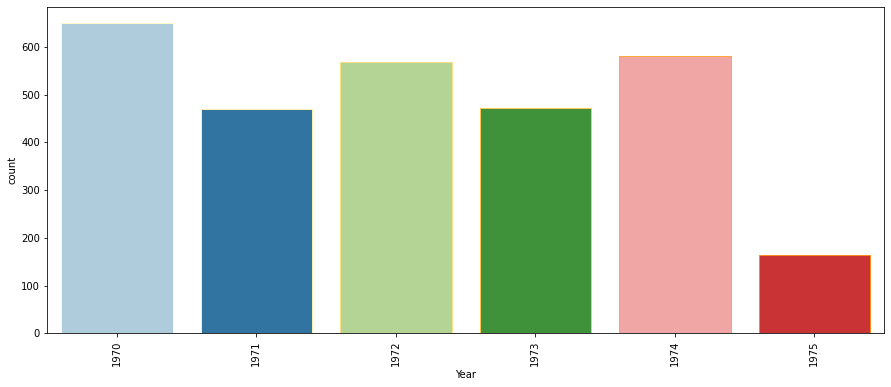

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Year', data=terr_df2, palette='Paired',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.show()

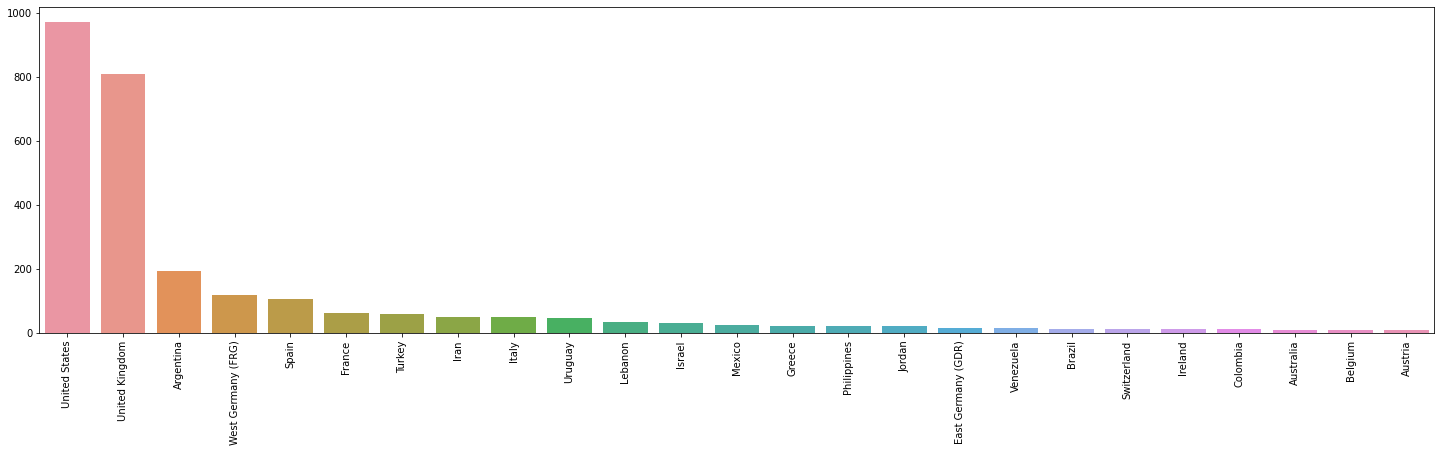

In [ ]:
plt.subplots(figsize=(25,6))
sns.barplot(x=terr_df2['Country'].value_counts()[0:25].index, y=terr_df2['Country'].value_counts()[0:25].values,data=terr_df2)
plt.xticks(rotation=90)
plt.show()

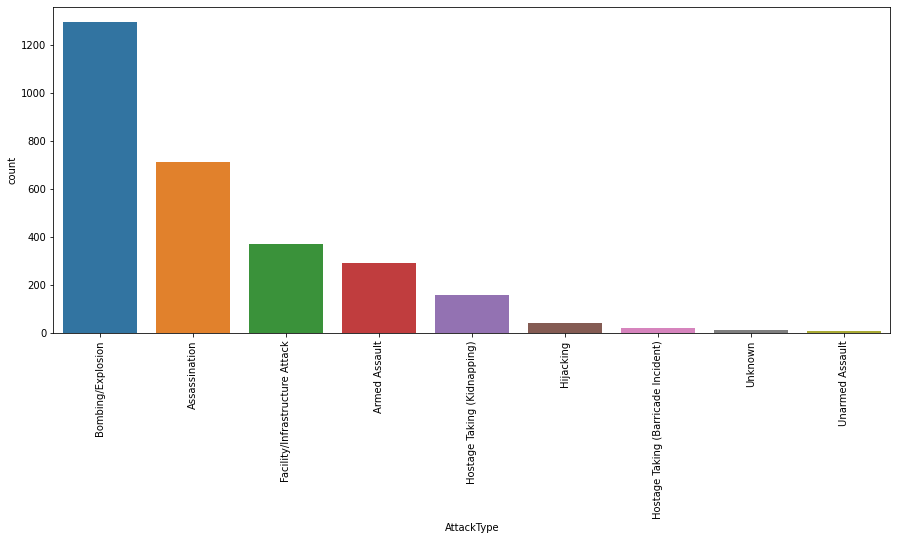

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(x='AttackType', data=terr_df2, order=terr_df2['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

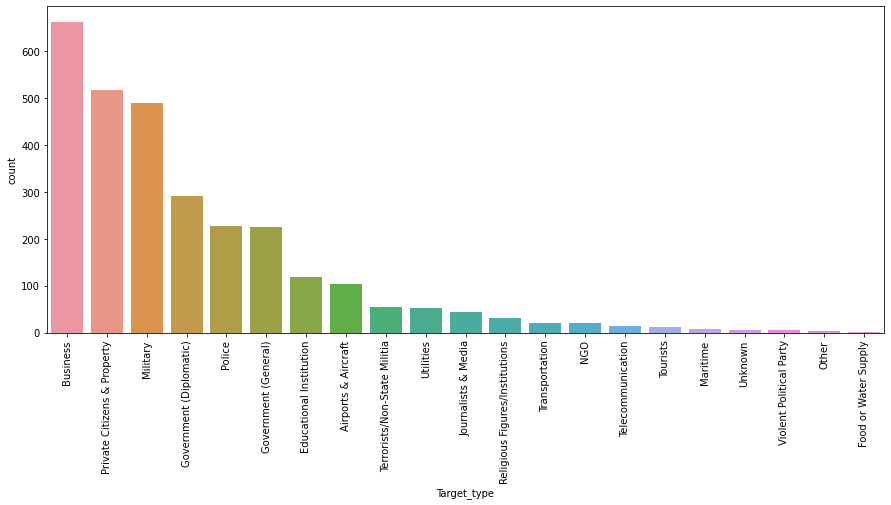

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Target_type', data=terr_df2, order=terr_df2['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

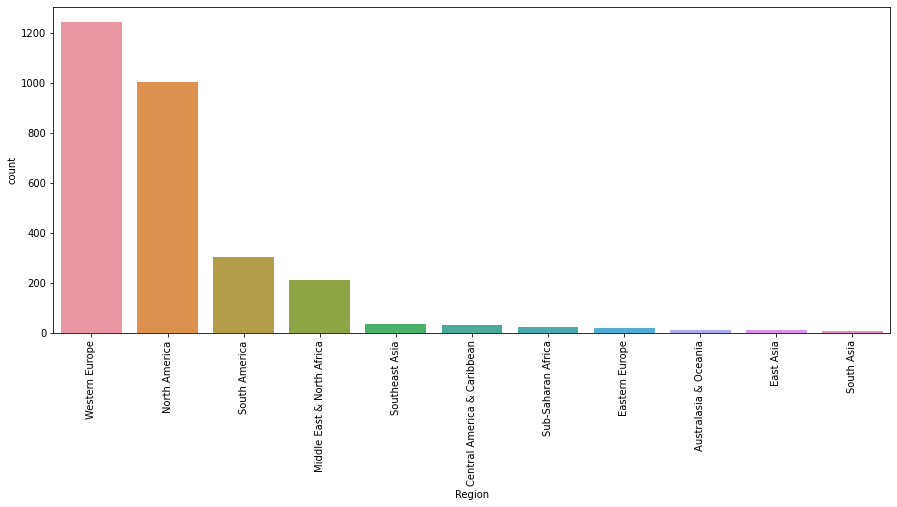

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Region', data=terr_df2, order=terr_df2['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

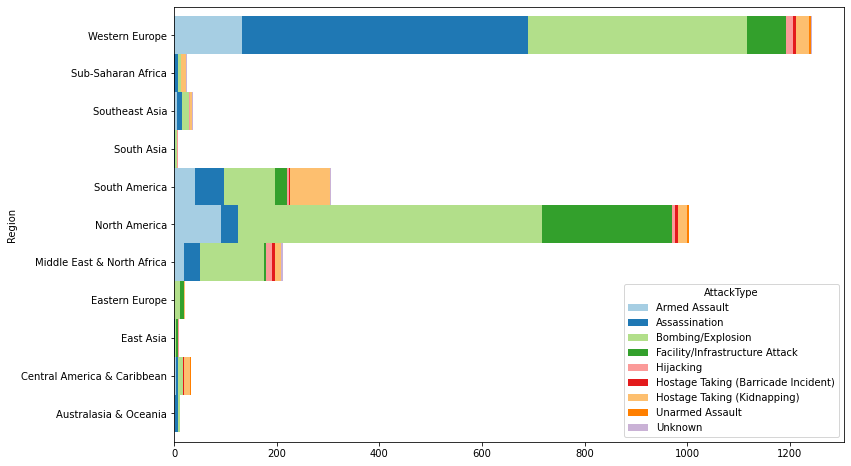

In [ ]:
terr_Reg_AttackType=pd.crosstab(terr_df2['Region'],terr_df2['AttackType'])
terr_Reg_AttackType.plot.barh(stacked=True,width=1, color=sns.color_palette('Paired'))
fig=plt.gcf()
fig.set_size_inches(12,8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


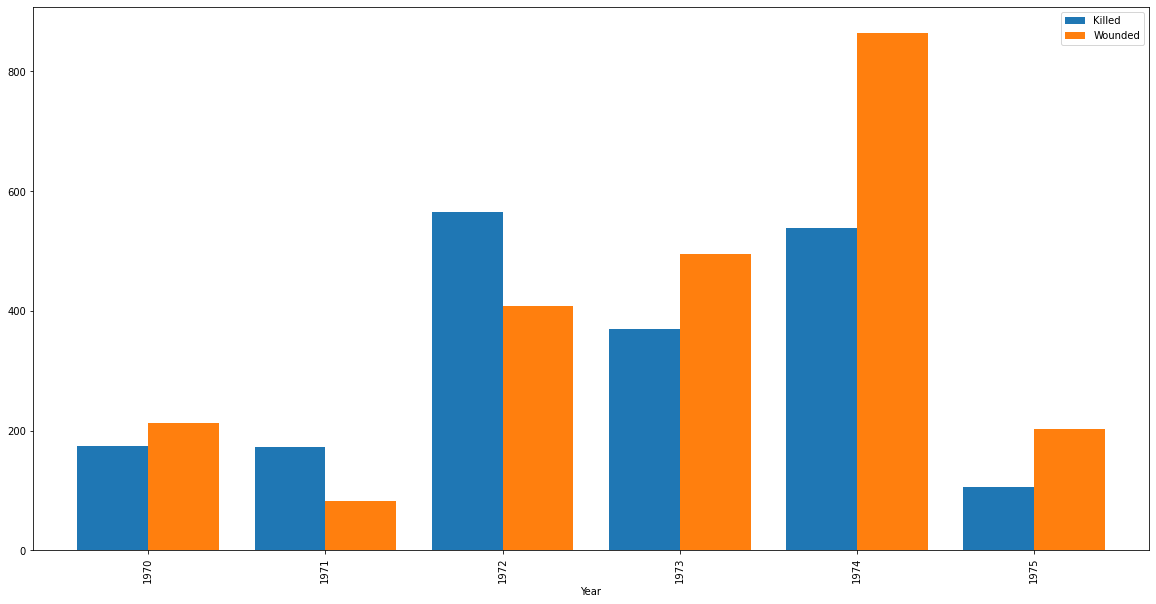

In [ ]:
terr_yr_kill_wound=terr_df2.groupby('Year')['Killed','Wounded'].sum()
terr_yr_kill_wound.plot.bar(width=0.8,figsize=(20,10))
plt.show()

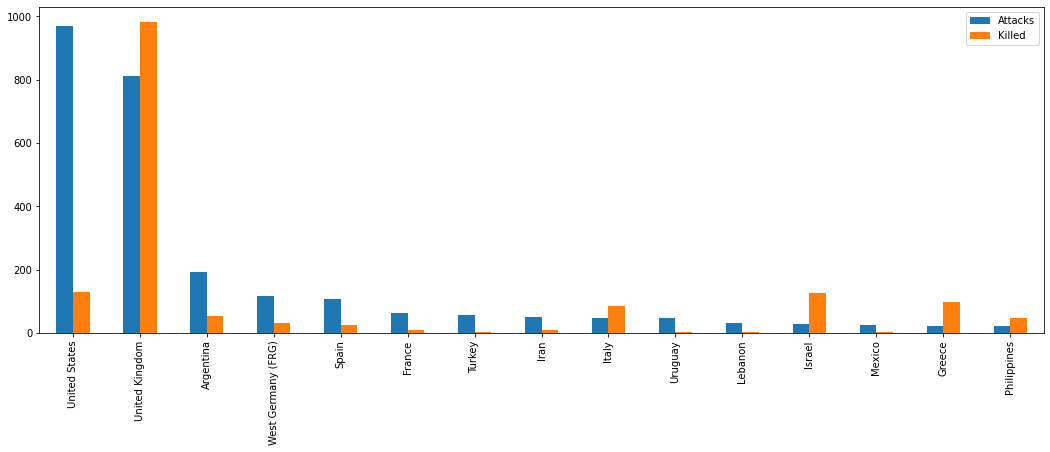

In [ ]:
count_terr = terr_df2['Country'].value_counts()[0:15].to_frame()
count_terr.columns=['Attacks']
count_kill=terr_df2.groupby('Country')['Killed'].sum().to_frame()
count_Attack_Killed=count_terr.merge(count_kill,left_index=True,right_index=True, how='left')
count_Attack_Killed.plot.bar(width=0.5, figsize=(18,6))
plt.show()

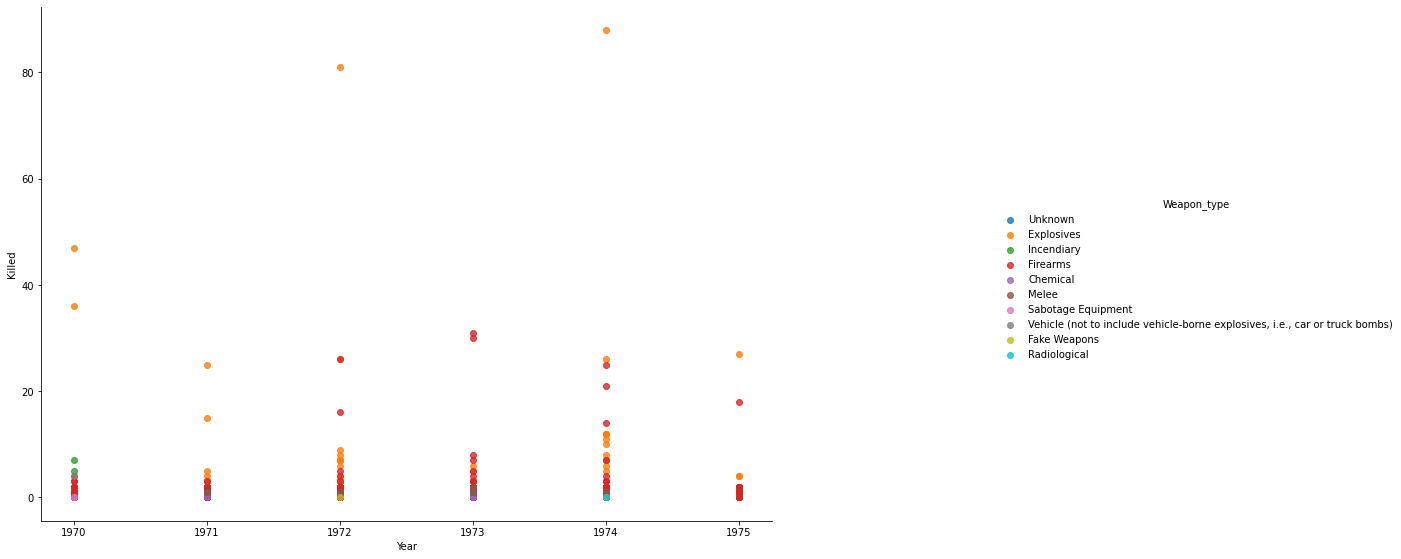

In [ ]:
sns.lmplot(x='Year',y='Killed', data=terr_df2,fit_reg=False, hue='Weapon_type',legend=True,aspect=15/10)
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.show()

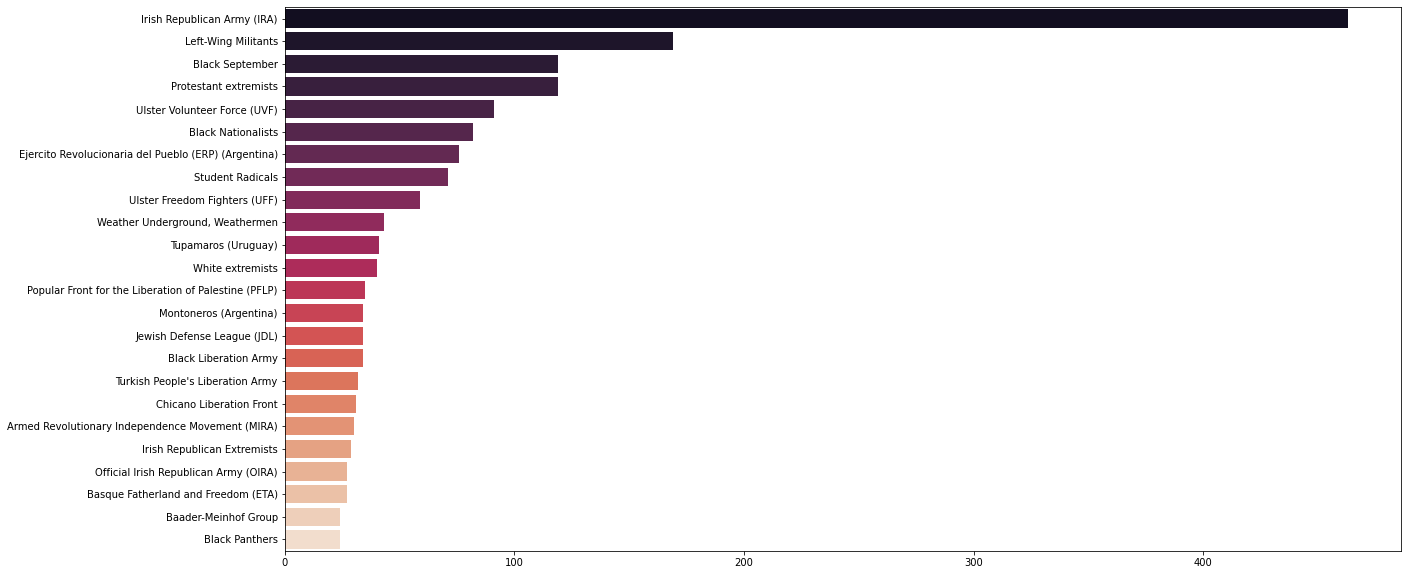

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot( y=terr_df2['Group'].value_counts()[1:25].index, x=terr_df2['Group'].value_counts()[1:25].values, palette=('rocket'))
plt.show()

In [ ]:
terr_df2['Wounded']=terr_df2['Wounded'].fillna(0).astype(int)
terr_df2['Killed']=terr_df2['Killed'].fillna(0).astype(int)
terr_df2['Casualities']=terr_df2['Wounded']+terr_df2['Killed']

In [ ]:
terr_df3=terr_df2[(terr_df2['Group']!='Unknown') & (terr_df2['Casualities']>50)]
terr_df3.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
1200,1972,3,4,United Kingdom,Northern Ireland,Western Europe,Belfast,54.607712,-5.956210,Bombing/Explosion,2,130,"Janet Bereen, 21 and Anne Owens, 22, Catholics",NaN,Irish Republican Army (IRA),Business,Explosives,NaN,132
1314,1972,5,30,Israel,Central,Middle East & North Africa,Lod,32.004361,34.888229,Bombing/Explosion,26,72,Aircraft Terminal,NaN,Japanese Red Army (JRA),Airports & Aircraft,Firearms,NaN,98
1789,1973,3,8,United Kingdom,England,Western Europe,London,51.504387,-0.140041,Bombing/Explosion,1,238,Court Building,NaN,Irish Republican Army (IRA),Government (General),Explosives,NaN,239
1972,1973,8,5,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,5,55,TWA Lounge,NaN,Black September,Airports & Aircraft,Firearms,NaN,60
2138,1973,12,17,Italy,Lazio,Western Europe,Rome,41.890961,12.490069,Hostage Taking (Barricade Incident),30,50,Pan Am Lounge and Loading Pan Am 707,NaN,Black September,Airports & Aircraft,Firearms,NaN,80


In [ ]:
terr_df3 = terr_df3.sort_values(['Region', 'Country'])

In [ ]:
terr_df3 = terr_df3.drop(['latitude','longitude','Summary','Motive','Target'],axis=1)

In [ ]:
terr_df3 = terr_df3.dropna(subset=['city'])

In [ ]:
terr_df3.isnull().sum()

Year           0
Month          0
Day            0
Country        0
state          0
Region         0
city           0
AttackType     0
Killed         0
Wounded        0
Group          0
Target_type    0
Weapon_type    0
Casualities    0
dtype: int64

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [ ]:
hover_text=[]
for index, row in terr_df3.iterrows():
  hover_text.append(('City : [city]<br>'+'Group : [group]<br>'+'Casualities: [casualities]<br>'+'Year:[Year]').format(city=row['city'], group=row['Group'],casualities=row['Casualities'],Year=row['Year']))
terr_df3['text']=hover_text

In [ ]:
trace0=go.Scatter(
    x=terr_df3['Year'][terr_df3['Country']=='Japan'],
    y=terr_df3['Casualities'][terr_df3['Country']=='Japan'],
    mode='markers',
    name='Japan',
    text=terr_df3['text'][terr_df3['Country'] == 'Japan'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terr_df3['Casualities'][terr_df3['Country']=='Japan'],
        line=dict(width=2),)
                  )
trace1=go.Scatter(
    x=terr_df3['Year'][terr_df3['Country']=='Sri Lanka'],
    y=terr_df3['Casualities'][terr_df3['Country']=='Sri Lanka'],
    mode='markers',
    name='Sri Lanka',
    text=terr_df3['text'][terr_df3['Country'] == 'Sri Lanka'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terr_df3['Casualities'][terr_df3['Country']=='Sri Lanka'],
        line=dict(width=2),)
                  )
trace2=go.Scatter(
    x=terr_df3['Year'][terr_df3['Country']=='Nicaragua'],
    y=terr_df3['Casualities'][terr_df3['Country']=='Nicaragua'],
    mode='markers',
    name='Nicaragua',
    text=terr_df3['text'][terr_df3['Country'] == 'Nicaragua'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terr_df3['Casualities'][terr_df3['Country']=='Nicaragua'],
        line=dict(width=2),)
                  )
trace3=go.Scatter(
    x=terr_df3['Year'][terr_df3['Country']=='El Salvador'],
    y=terr_df3['Casualities'][terr_df3['Country']=='El Salvador'],
    mode='markers',
    name='El Salvador',
    text=terr_df3['text'][terr_df3['Country'] == 'El Salvador'],
    marker=dict(
        symbol='circle',
        sizemode='area',
        size=terr_df3['Casualities'][terr_df3['Country']=='El Salvador'],
        line=dict(width=2),)
                  )

In [ ]:
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(
         title = 'The Big Four',
         xaxis = dict(
             title = 'Year',
             #type = 'log',
             range = [1976,2016],
             tickmode = 'auto',
             nticks = 30,
             showline = True,
             showgrid = False
             ),
         yaxis = dict(
             title = 'Casualities',
             type = 'log',
             range = [1.8,3.6],
             tickmode = 'auto',
             nticks = 40,
             showline = True,
             showgrid = False),
         paper_bgcolor='rgb(243, 243, 243)',
         plot_bgcolor='rgb(243, 243, 243)',
         )

In [ ]:
fig=go.Figure(data=data,layout=layout)
py.iplot(fig, filename='Terrorism Bubble')

In [ ]:
terr_df2['Group'].value_counts()[1:15]

Irish Republican Army (IRA)                             463
Left-Wing Militants                                     169
Black September                                         119
Protestant extremists                                   119
Ulster Volunteer Force (UVF)                             91
Black Nationalists                                       82
Ejercito Revolucionaria del Pueblo (ERP) (Argentina)     76
Student Radicals                                         71
Ulster Freedom Fighters (UFF)                            59
Weather Underground, Weathermen                          43
Tupamaros (Uruguay)                                      41
White extremists                                         40
Popular Front for the Liberation of Palestine (PFLP)     35
Montoneros (Argentina)                                   34
Name: Group, dtype: int64

In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
terr_group=terr_df2.dropna(subset=['latitude','longitude'])
terr_group=terr_group.drop_duplicates(subset=['Country','Group'])

In [ ]:
terrorist_groups=terr_df2.Group.value_counts()[1:8].index.to_list()

In [ ]:
terr_group=terr_group.loc[terr_group.Group.isin(terrorist_groups)]

In [ ]:
terr_group.Group.unique()

array(['Black Nationalists', 'Left-Wing Militants',
       'Irish Republican Army (IRA)', 'Ulster Volunteer Force (UVF)',
       'Ejercito Revolucionaria del Pueblo (ERP) (Argentina)',
       'Protestant extremists', 'Black September'], dtype=object)

In [ ]:
m1 = folium.Map(location=[20, 0], tiles="Stamenterrain", zoom_start=2)
marker_cluster = MarkerCluster(
    name='clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)
for i in range(0,len(terr_group)):
    marker=folium.Marker([terr_group.iloc[i]['latitude'],terr_group.iloc[i]['longitude']]) 
    popup='Group:{}<br>Country:{}'.format(terr_group.iloc[i]['Group'],
                                          terr_group.iloc[i]['Country'])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
marker_cluster.add_to(m1)
folium.TileLayer('openstreetmap').add_to(m1)
folium.TileLayer('Mapbox Bright').add_to(m1)
folium.TileLayer('cartodbdark_matter').add_to(m1)
folium.TileLayer('stamentoner').add_to(m1)
folium.LayerControl().add_to(m1)
m1.save('Terrorist_Organizations_in_Country_cluster.html')

In [ ]:
m1

In [ ]:
from folium.plugins import HeatMap

In [ ]:
attack=terr_df2.loc[terr_df2.Year==1970][['latitude','longitude']]

In [ ]:
attack.latitude.fillna(0,inplace=True)
attack.longitude.fillna(0,inplace=True)
attack=attack.values.tolist()

In [ ]:
World =folium.Map(location=[0,0],zoom_start=2)
HeatMap(data=attack, radius=16).add_to(World)

print('Terrorism around the world in 1970')
World

Terrorism around the world in 1970


In [ ]:
df_count=terr_df2[['latitude','longitude','Country','Year','AttackType']]
df_count=df_count.dropna()
arrayName=[]
arrayCountry=[]
arrayYear=[]
for i in df_count['Country']:
  arrayCountry.append(i)
for i in df_count['Year']:
  arrayYear.append(i)
for i in range(len(df_count)):
  arrayName.append(i)

In [ ]:
location= df_count[['latitude','longitude']]
locationlist=location.values.tolist()

In [ ]:
BostonMap=folium.Map(location=[42.738006, -123.417103],zoom_start=4)
for point in range(len(location)):
  string=arrayYear[point]
  if arrayCountry[point]=='United States' and  string>=1970:
    folium.Marker(locationlist[point], popup='{}'.format(string)).add_to(BostonMap)
BostonMap

In [ ]:
df_count['AttackType'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [ ]:
arrayAttackType=[]
for i in df_count['AttackType']:
  arrayAttackType.append(i)
locations=df_count[['latitude','longitude']]
locationlist=locations.values.tolist()
BostonMap=folium.Map(location=[42.738006, -123.417103], zoom_start=4)
color='blue'
for i in range(len(locationlist)):
  string=arrayYear[i]
  if arrayCountry[i]=='United States' and string >= 1970:
    if arrayAttackType[i]=='Bombing/Explosion':
      color='red'
    elif arrayAttackType[i]=='Assassination':
      color='green'
    elif arrayAttackType[i]=='Armed Assault':
      color='purple'
    else:
      color='blue'
    typeFormat='{}-{}'.format(arrayAttackType[i],string)
    folium.Marker(locationlist[i],popup=typeFormat,icon=folium.Icon(color=color)).add_to(BostonMap)
print('Terrorist attacks in the United States after 1980 - Location and TypeAttack')
BostonMap

Terrorist attacks in the United States after 1980 - Location and TypeAttack
